In [1]:
from annotation_parser import parseAnnotation
from score_parser import parseScore
from common import TAVERNVERSIONS
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [2]:
def getAlignmentDataFrame(a, s):
    alignmentdf = pd.concat([a.measure, s.measure], axis=1, keys=['annotationMeasure', 'scoreMeasure'])
    alignmentdf['misalignment'] = (alignmentdf.annotationMeasure != alignmentdf.scoreMeasure)
    return alignmentdf

In [3]:
aPath = "alignment.txt" 
sPath = "alignment.mxl"

a = parseAnnotation(aPath)
s = parseScore(sPath)
alignmentdf = getAlignmentDataFrame(a, s)

In [4]:
alignmentdf

,annotationMeasure,scoreMeasure,misalignment
offset,,,
0.00,0.0,0.0,False
0.25,0.0,0.0,False
0.50,1.0,1.0,False
0.75,1.0,1.0,False
1.00,1.0,1.0,False
1.25,1.0,1.0,False
1.50,1.0,1.0,False
1.75,1.0,1.0,False
2.00,1.0,1.0,False


First misalignment at:
Empty DataFrame
Columns: [annotationMeasure, scoreMeasure, misalignment]
Index: []
Alignment Score:  0.0


<AxesSubplot:xlabel='offset', ylabel='annotationMeasure'>

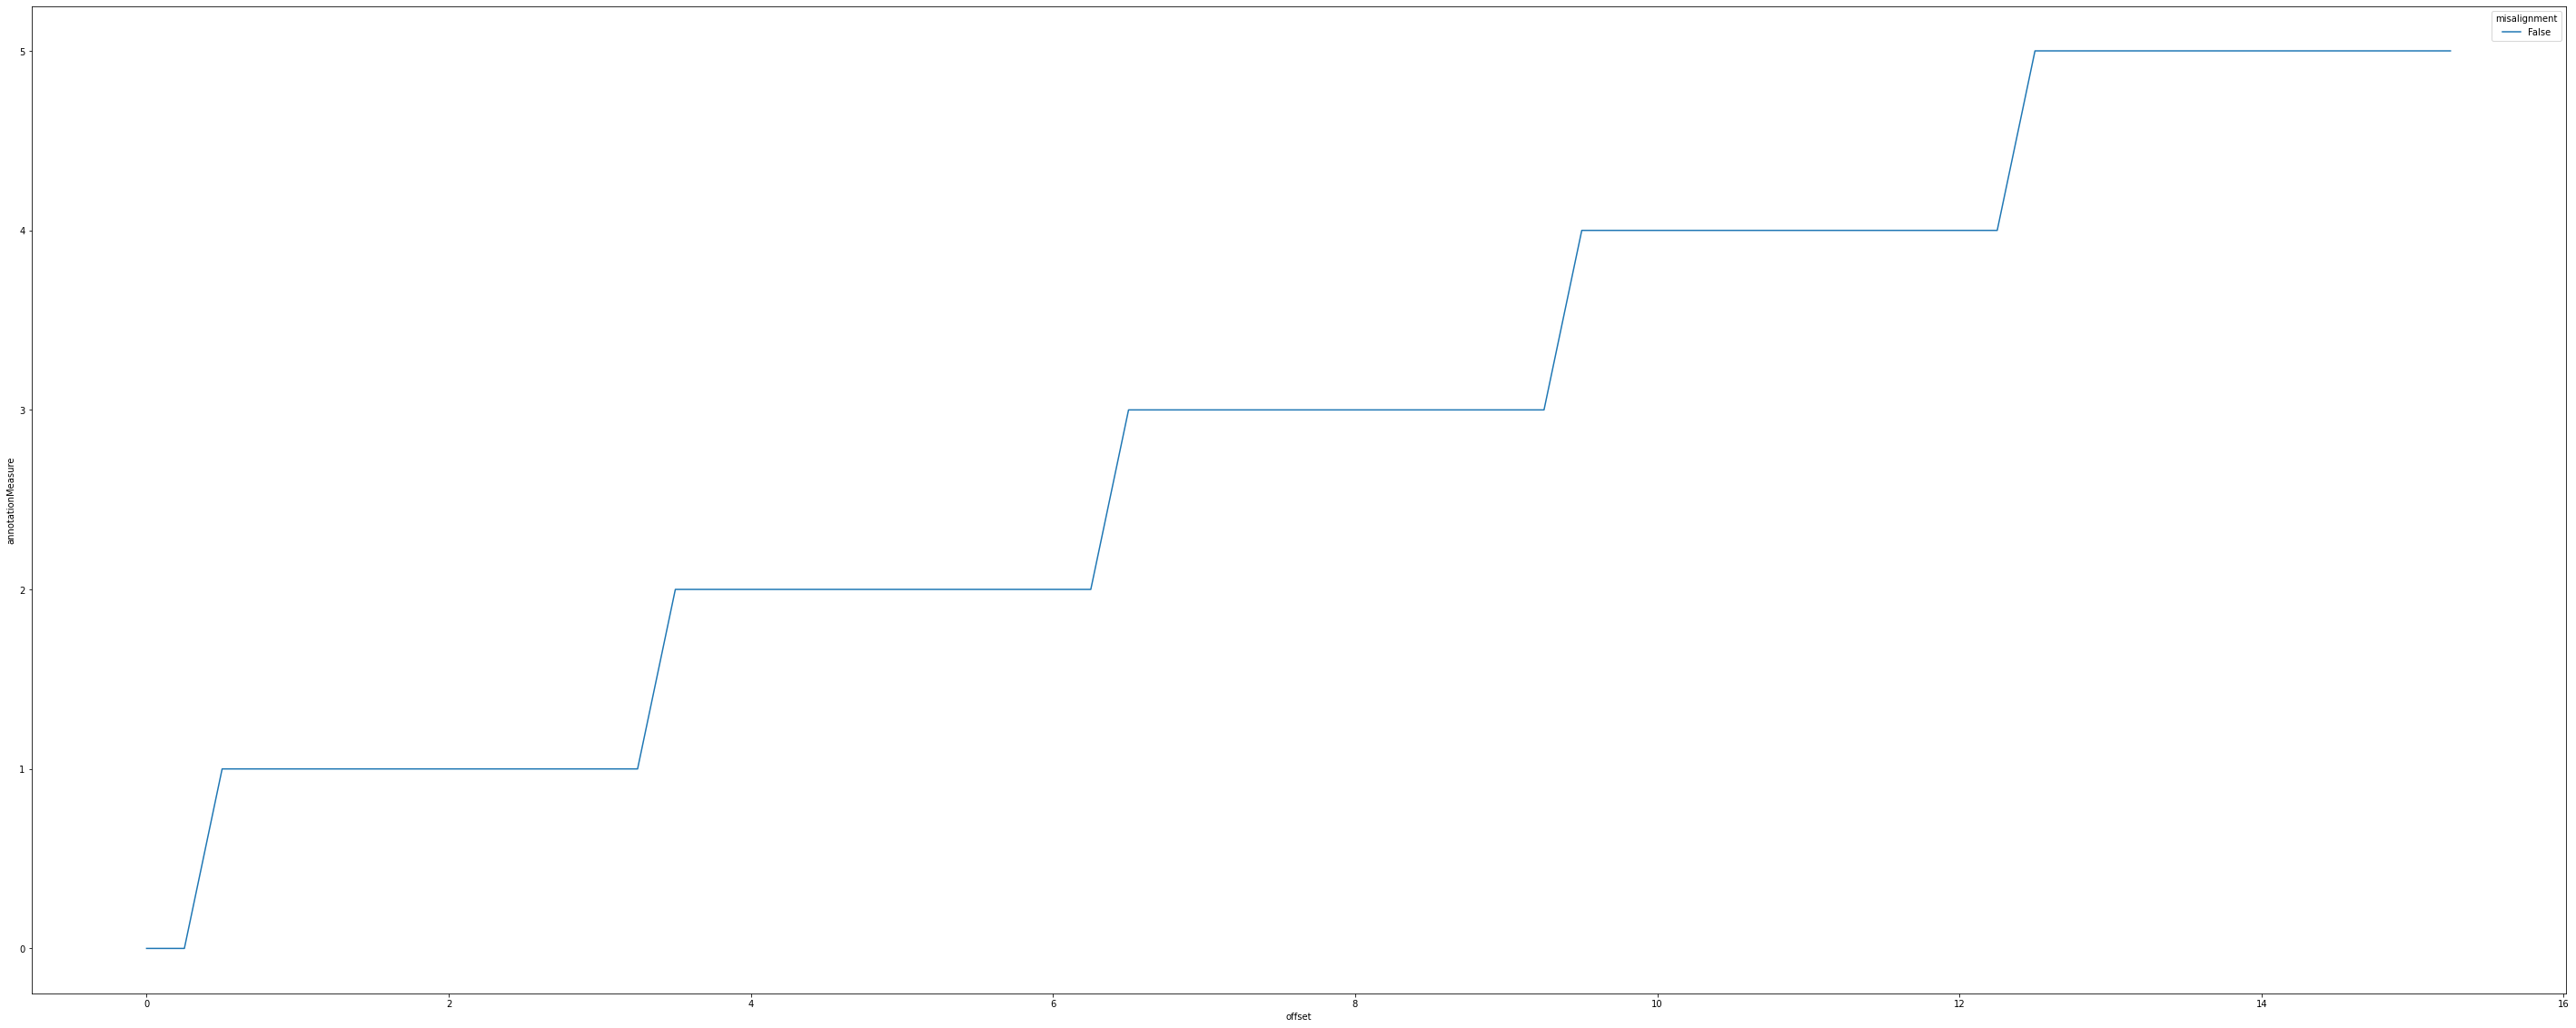

In [5]:
print('First misalignment at:')
print(alignmentdf[alignmentdf.misalignment].head(1))
print("Alignment Score: ", alignmentdf.misalignment.mean())
plt.figure(figsize=(50, 20))
sns.lineplot(x='offset', y='annotationMeasure', hue="misalignment", style="misalignment", data=alignmentdf)

In [6]:
for annotation, scoreVersions in TAVERNVERSIONS.items():
    for version, score in scoreVersions.items():
        if "K398" not in annotation or version != "aligned":
            continue
        print(annotation, score)
        try:
            a = parseAnnotation(annotation)
            s = parseScore(score)
        except:
            print("\tFAILED")
            pass
            continue
        alignmentdf = getAlignmentDataFrame(a, s)
        print('First misalignment at:')
        print(alignmentdf[alignmentdf.misalignment].head(1))
        print("Alignment Score: ", alignmentdf.misalignment.mean())
        plt.figure(figsize=(50, 20))
        sns.lineplot(x='offset', y='annotationMeasure', hue='misalignment', style="misalignment", data=alignmentdf)
        plt.show()

In [7]:
alignmentdf

,annotationMeasure,scoreMeasure,misalignment
offset,,,
0.00,1.0,1.0,False
0.25,1.0,1.0,False
0.50,1.0,1.0,False
0.75,1.0,1.0,False
1.00,1.0,1.0,False
1.25,1.0,1.0,False
1.50,1.0,1.0,False
1.75,1.0,1.0,False
2.00,1.0,1.0,False
